In [2]:
import pandas as pd
from bunkatech.topic_modeling.nested_topics import NestedTopicModeling

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data.sample(100)

In [3]:
# All the basic components to compute before more specialized computation
nested = NestedTopicModeling(data = data,
                        text_var = 'description',
                        index_var = 'imdb',
                        extract_terms=True,
                        terms_embedding=True,
                        docs_embedding=True,
                        sample_size_terms=500,
                        terms_limit=500,
                        terms_ents=True,
                        terms_ngrams=(1, 2),
                        terms_ncs=True,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="distiluse-base-multilingual-cased-v1",
                        docs_embedding_model="tfidf",
                        language="en",
                        terms_path=None,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None)

Extract Terms: 100%|███████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.15it/s]


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [4]:
nested.fit(folding = None)

UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Thu Mar 17 21:49:11 2022 Construct fuzzy simplicial set
Thu Mar 17 21:49:11 2022 Finding Nearest Neighbors
Thu Mar 17 21:49:13 2022 Finished Nearest Neighbor Search
Thu Mar 17 21:49:15 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 17 21:49:17 2022 Finished embedding


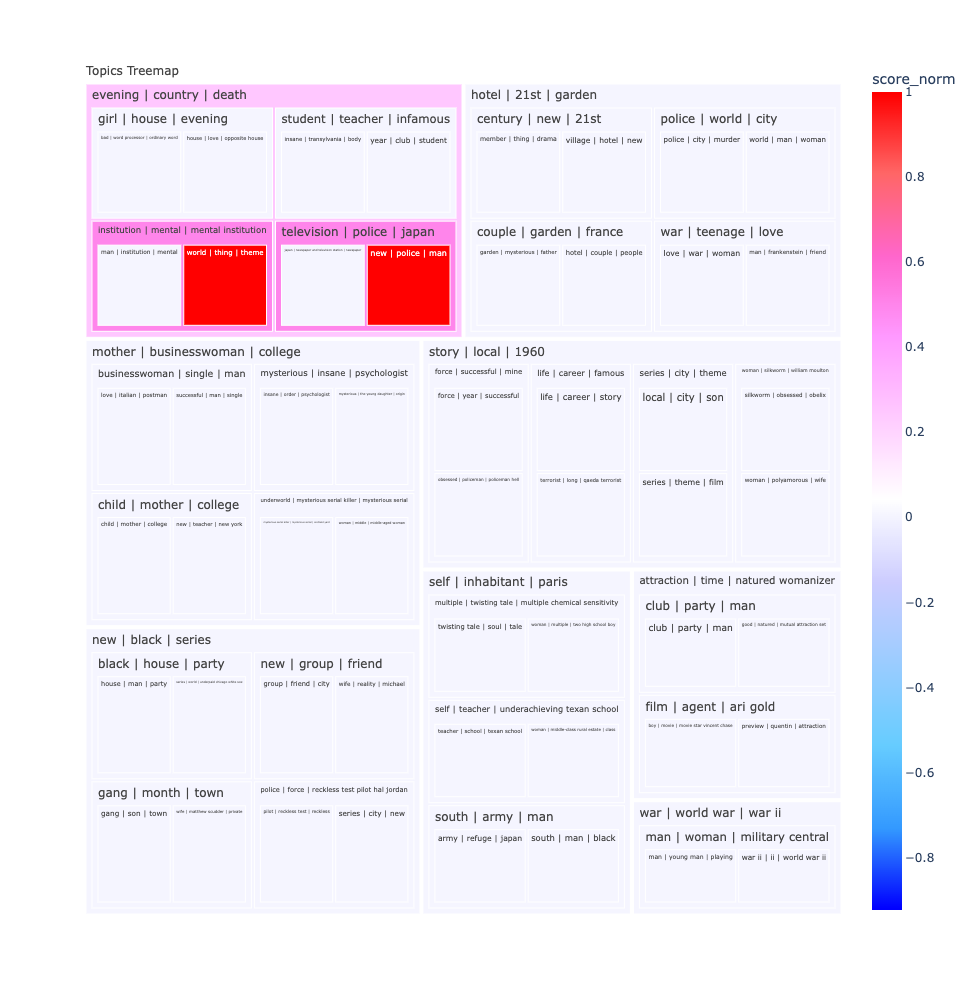

In [8]:
nested.nested_maps(
        size_rule="equal_size",
        map_type="treemap",
        width=1000,
        height=1000,
        query=['death'])

UMAP( verbose=True)
Thu Mar 17 21:50:23 2022 Construct fuzzy simplicial set
Thu Mar 17 21:50:24 2022 Finding Nearest Neighbors
Thu Mar 17 21:50:24 2022 Finished Nearest Neighbor Search
Thu Mar 17 21:50:24 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 17 21:50:26 2022 Finished embedding


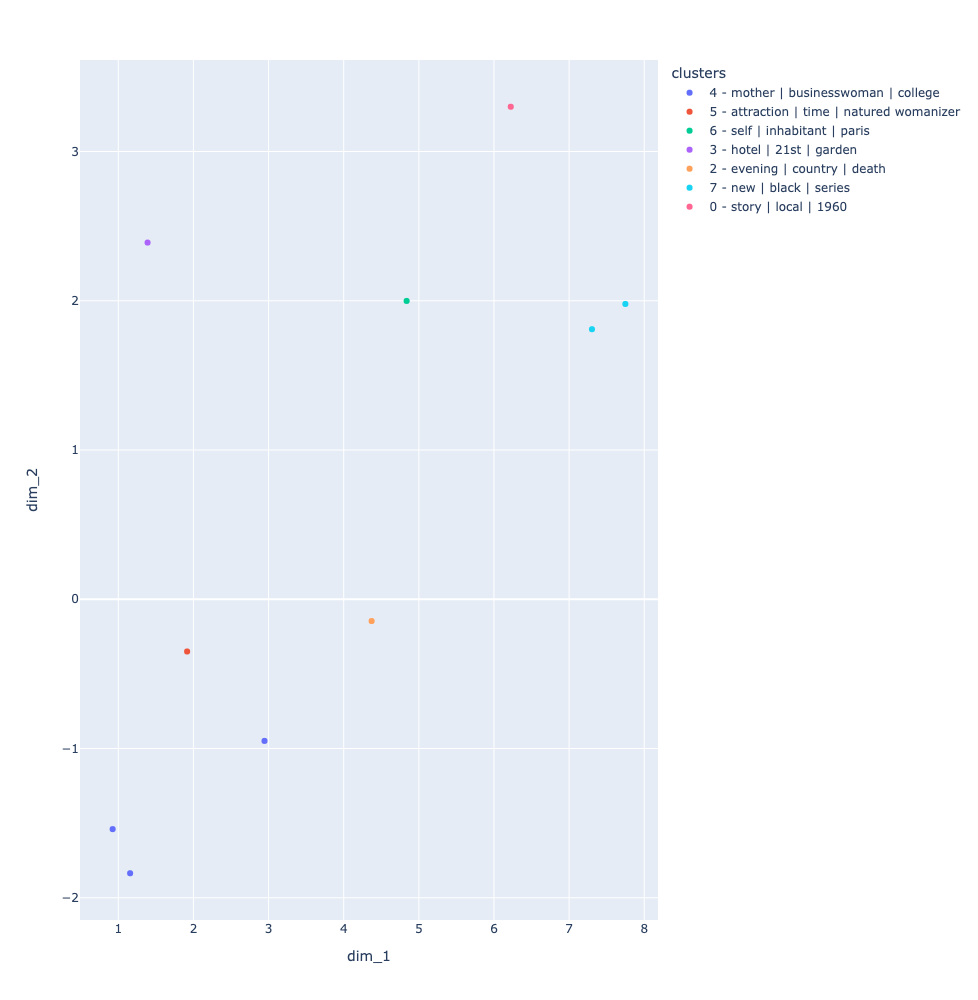

In [9]:
nested.visualize_embeddings(nested_level=0)

In [10]:
nested.get_centroid_documents(nested_level=0, top_elements=2)

,clusters,centroid_docs,farest_doc,cluster_radius
0,0,The story of a married silkworm merchant-turne...,A chronicle of the decade-long hunt for al-Qae...,1.562793
1,1,"During World War II era, a young woman, Wang J...",An American family on holiday in Africa become...,1.487849
2,2,A newspaper and television station funded by a...,"After being committed for 17 years, Michael My...",1.661325
3,3,A couple tries to repair their marriage while ...,"Amidst the war climate, a teenage boy discover...",1.482303
4,4,"After a break up, Jenny moves in with writer K...",A mysterious serial killer is shocking the und...,1.979434
5,5,Quentin Tarantino and Robert Rodriguez's homag...,A small-time rancher agrees to hold a captured...,1.298589
6,6,"Nat Turner, a literate slave and preacher in t...",A group of slackers face an army of zombies. T...,1.661522
7,7,The Moorish General Othello is manipulated int...,A dramatization of the Black Sox scandal when ...,1.414965
